<a href="https://colab.research.google.com/github/ozturkbusrada/PII-Detection/blob/main/EDA_%2B_Baseline_PII_Data_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'pii-detection-removal-from-educational-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F66653%2F7500999%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240318%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240318T093143Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9297c0b18e17b4a6970ec26eab092faa1cbc67d96fed851c484114a369845d5daefa4c08e006ceac426c4d9e9962d768d9c370d5c57972f57407ef7243ba80cf317f14d7d8edeaa02387de466981fb963479ab3253920c0c9581a06d76236e78a388e5802b6a07eae156ff246e65c0440f860b90a3464c7c308c5ba1e0398effad45bbf130e596489dff7feae1fa0f6b7f53cdc20950eb0b27a8f79bea92169487a8e1f03323143cfe8ac39248136803c80a32fd4dbc84ae6c3b099bd21a08881ff05e52979174457d4f416c5acda5b398189f1dc09d55dd05c0eff23bccc5252e74c7113a8ae1e83cbf1751110cf6d835c1e3048ec7f49547db282e115c7459'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 22403094 bytes downloaded
Downloaded and uncompressed: pii-detection-removal-from-educational-data
Data source import complete.


<Mark> EDA NOTEBOOK ANALYSİS :
    
<Mark>1. Distribution of Total Words
    
<Mark>2. All Texts vs. Texts without Outer(O)
    
<Mark>3. Distribution of Total Words(Text with Labels) vs Distribution of Total Words(Text with Outer)
    
<Mark>4. Texts with Labels vs Texts without Labels
    
<Mark>5. Texts with personal information vs Texts without personal information
    
<Mark>6. Label-containing Texts" and "Texts without labels other than "Outer
    
<Mark>7. Relationship between Text Length and Number of Labels (All Texts) " and "Relationship between Text Length and Number
    
<Mark>8. Text Length vs Number of Labels
    
<Mark>9. This code snippet is used to check if there are any texts without labels (excluding 'outer'). It provides an output based on the result of this check, indicating whether such texts exist or not
    
<Mark>10. Top 25 Most Common Tokens
    
<Mark>11. Most common labels and their frequency
    
<Mark>12. Percentage of Punctuation Usage-With labels vs Without Labels
    
<Mark>13. Distribution of Type-Token %
       





# The Learning Agency Lab - PII Data Detection
Develop automated techniques to detect and remove PII from educational data - EDA</mark>
<span style="font-size:22px;color:purple"> Thank you for having a look at my notebook - advice and feedback always welcomed!</span>


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 Dataset Link: <a href="https://www.kaggle.com/competitions/pii-detection-removal-from-educational-data/data">https://www.kaggle.com/competitions/pii-detection-removal-from-educational-data/data</a>
</div>


## **Exploratory Data Analysis (EDA)**
EDA is a crucial step in understanding and preparing your data for any data analysis or machine learning project, including he Learning Agency Lab - PII Data Detection. Here's a step-by-step guide on how to perform an EDA for this dataset:

**Overview**

he goal of this competition is to develop a model that detects personally identifiable information (PII) in student writing. Your efforts to automate the detection and removal of PII from educational data will lower the cost of releasing educational datasets. This will support learning science research and the development of educational tools.


**Data Collection:**

The competition dataset comprises approximately 22,000 essays written by students enrolled in a massively open online course. All of the essays were written in response to a single assignment prompt, which asked students to apply course material to a real-world problem. The goal of the competition is to annotate personally identifiable information (PII) found within the essays.

**Data Loading:**

Import the dataset into your preferred data analysis environment, such as Python with libraries like pandas, numpy, and matplotlib/seaborn for visualization.



### **Initial Exploration:**

**1 - Start by examining the basic characteristics of the data:**

    Check the first few rows using df.head().
    Check the data types and missing values using df.info().
    Calculate basic statistics using df.describe().
    Data Cleaning:

**2 - Handle missing values, outliers, and duplicates:**

    Use techniques like imputation for missing values.
    Identify and deal with outliers appropriately.
    Remove duplicate rows if necessary.
    
**3 - Data Visualization:**

    Create visualizations to gain insights into the data:
    Histograms and box plots for numerical features.
    Bar plots for categorical features.
    Correlation matrix and scatter plots to understand relationships between variables.
    
**4 - Feature Analysis:**

    Explore relationships between features and the target variable(s) for classification and outlier detection.
    Visualize how different features vary across different subtypes or classes.
    Use box plots, violin plots, or swarm plots to compare feature distributions.

**5 - Outlier Detection:**

    If your dataset contains information related to outlier detection, perform a dedicated EDA for this aspect:
    Visualize outliers using scatter plots or box plots.
    Apply statistical methods or machine learning techniques to identify outliers.

**6 - Dimensionality Reduction (optional):**

    If the dataset has many features, consider dimensionality reduction techniques like Principal Component Analysis (PCA) to reduce the number of variables while preserving important information.

**8 - Summary and Insights:**

    Summarize your findings from the EDA, including any patterns, trends, or anomalies observed.
    Document any data preprocessing steps applied.

**7 - Next Steps:**

    Based on your EDA findings, plan your next steps, which may include feature engineering, model selection, and further data preprocessing.


Remember that EDA is an iterative process, and you may need to revisit these steps as you delve deeper into the dataset and develop your machine learning or data analysis models.

In [2]:
# Importing necessary libraries
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation
import matplotlib.pyplot as plt  # Matplotlib for basic plotting
import seaborn as sns  # Seaborn for statistical data visualization

import plotly.graph_objs as go  # Plotly for interactive plots
import plotly.offline as py  # Plotly for offline plotting
import plotly.express as px  # Plotly Express for simplified plotting
import json  # JSON for handling JSON data

from collections import Counter  # Counter for counting occurrences

import warnings
warnings.filterwarnings('ignore')  # Ignore warnings for cleaner output

In [3]:
df = pd.read_json('/kaggle/input/pii-detection-removal-from-educational-data/train.json', encoding = 'utf-8-sig')

In [4]:
df.head()

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."


### **Data Description**

**document** is the document id (int)

**full_text** is the text on which we need to peform PII detection (str)

**tokens** is a list of tokens of full_text which we have to label (list[str])

**trailing_whitespace** is a list of boolean values corresponding to every token whether it is followed by a whitespace or not (list[bool])

**labels** is a list of BIO labels for every token. "B" indicates the beginning of an entity, "I" indicates if the token is inbetween (inner) two entities, "O" is the outer entity i.e not labeled. (list[str])

## **Statistical and Exploratory Data Analysis**


In [5]:
df.isnull().sum()

document               0
full_text              0
tokens                 0
trailing_whitespace    0
labels                 0
dtype: int64

# 1. Distribution of Total Words
 A histogram plot is created to visualize the distribution of token counts in the text data of a DataFrame. This provides information about the lengths of the texts and gives an idea about the overall structure of the texts in the dataset.



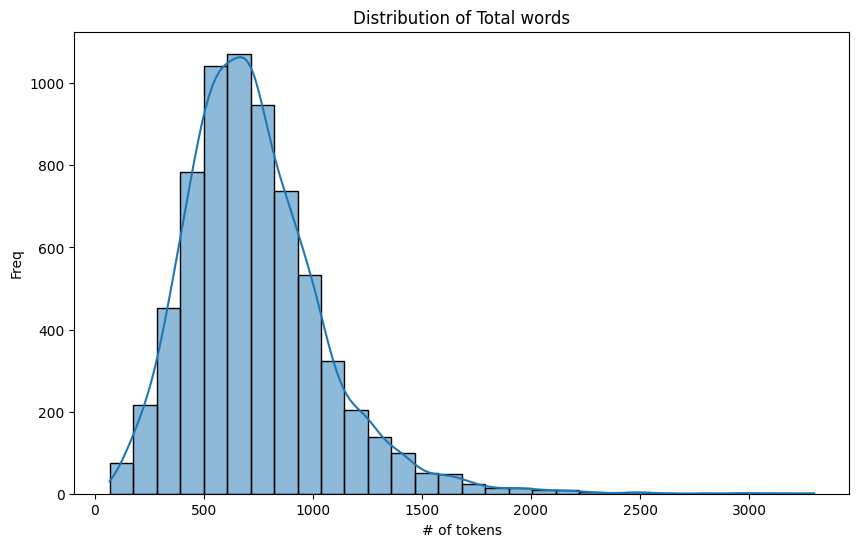

In [6]:
df['total_tokens'] = df['tokens'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['total_tokens'], bins=30, kde=True)
plt.title('Distribution of Total words')
plt.xlabel('# of tokens')
plt.ylabel('Freq')
plt.show()

**> In the histogram graph, the highest frequency is observed in the range of approximately 500 to 700 token counts. We can understand that most of the elements in the dataset fall within this range of token counts. As the token count increases, we see a decrease in frequency. This means that the number of elements with longer tokens decreases. The number of elements containing more than 1000 tokens is very low. We can conclude that while average to short tokens are common, longer tokens are less common.
**> Additionally, the prevalence of short tokens in the text can indicate that there are more simple and commonly used words. On the other hand, long tokens in the text are rare and likely consist of specific content such as proper nouns

Histogram grafiğinde gözlemlenen en yüksek frekans yaklaşık 500 ile 700 token sayısı aralığında.
Data setteki çoğu ögenin bu token sayısı aralığında olduğunu anlıyoruz.Token sayısı arttıkça
frekansın azaldığını görüyoruz. Yani daha uzun  tokenlara sahip öğelerin sayısı giderek azalıyor.
1000 den fazla token içeren öğe sayısı çok az. Ortalama-kısa tokenler yaygınken uzun tokenler
daha az yaygın oldugu sonucuna varabiliriz.Ayrıca; Metindeki kısa tokenların daha yaygın olması, genellikle basit ve sık kullanılan kelimelerin daha fazla oldugunu gosterebilir.
Metindeki uzun tokenlar ise çok nadir ve muhtemelen özel isim gibi spesifik içeriklerden oluşuyor.

In [7]:
df.sort_values(['total_tokens'])

,document,full_text,tokens,trailing_whitespace,labels,total_tokens
2713,13147,Think Twice and Make a Wise\n\nConcept Mapping...,"[Think, Twice, and, Make, a, Wise, \n\n, Conce...","[True, True, True, True, True, False, False, T...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",69
5402,19614,Who are your target customers?\n\nPatients hav...,"[Who, are, your, target, customers, ?, \n\n, P...","[True, True, True, True, False, False, False, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",71
5098,18959,Reflection writing rubric it represents throug...,"[Reflection, writing, rubric, it, represents, ...","[True, True, True, True, True, True, False, Tr...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",85
5966,20900,Mind Mapping selection:\n\nMind mapping is us...,"[Mind, Mapping, , selection, :, \n\n, Mind, m...","[True, True, False, False, False, False, True,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",88
1902,11469,Construct Your Problems\n\nVisualization is on...,"[Construct, Your, Problems, \n\n, Visualizatio...","[True, True, False, False, True, True, True, T...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",88
...,...,...,...,...,...,...
781,9188,Design Thinking in Career Development and Coun...,"[Design, Thinking, in, Career, Development, an...","[True, True, True, True, True, True, True, Fal...","[O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-NAM...",2781
1207,10078,Overcoming Barriers - The Story of the Movie a...,"[Overcoming, Barriers, -, The, Story, of, the,...","[True, True, True, True, True, True, True, Tru...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",2956
6365,21720,"In this assignment, a reflective report will b...","[In, this, assignment, ,, a, reflective, repor...","[True, True, False, True, True, True, True, Tr...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",3007
3175,14267,"MIAMISBURG, Ohio, Dec. 10, 2019 /PRNewswire/ -...","[MIAMISBURG, ,, Ohio, ,, Dec., 10, ,, 2019, /P...","[False, True, False, True, True, False, True, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",3133


In [8]:
# 'total_tokens' sütununu hesapla
df['total_tokens'] = df['tokens'].apply(len)

In [9]:
# 'labels' sütununda sadece Outer(O) etiketi içermeyenleri seç
df_non_outer = df[df['labels'].apply(lambda x: len(set(x)) > 1)]

# 2. All Texts vs. Texts without Outer(O)
A histogram graph is created to compare the distribution of token counts between all texts and texts without the outer (O) category.This histogram graph allows for the comparison of the distribution of token counts between all texts and texts that do not belong to the outer (O) category.

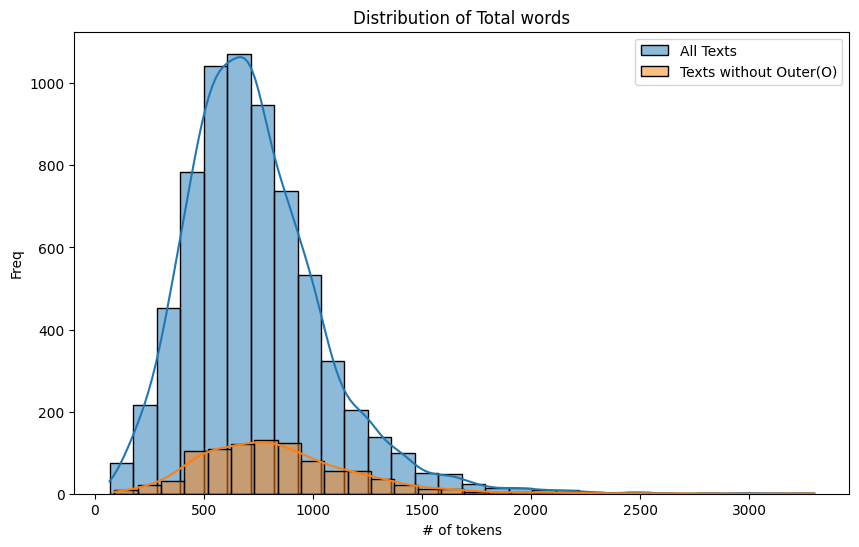

In [10]:
# Etiket içeren text'lerin histogramı
plt.figure(figsize=(10, 6))
sns.histplot(df['total_tokens'], bins=30, kde=True, label='All Texts')
sns.histplot(df_non_outer['total_tokens'], bins=30, kde=True, label='Texts without Outer(O)')
plt.title('Distribution of Total words')
plt.xlabel('# of tokens')
plt.ylabel('Freq')
plt.legend()
plt.show()

In [11]:
# PII with Outer etiketlerini içeren ve sadece Outer etiketlerini içeren textleri seç
df_pii_with_outer = df[df['labels'].apply(lambda x: 'PII' in x and 'O' in x)]
df_outer = df[df['labels'].apply(lambda x: 'O' in x and len(set(x)) == 1)]

# 3. Distribution of Total Words(Text with Labels) vs Distribution of Total Words(Text with Outer)
Two histogram graphs are created to compare the distribution of token counts between texts with labels and texts that have only the "outer" (O) label. This allows us to observe the differences in the distribution of token counts between texts with labels and texts that specifically have the "outer" label.

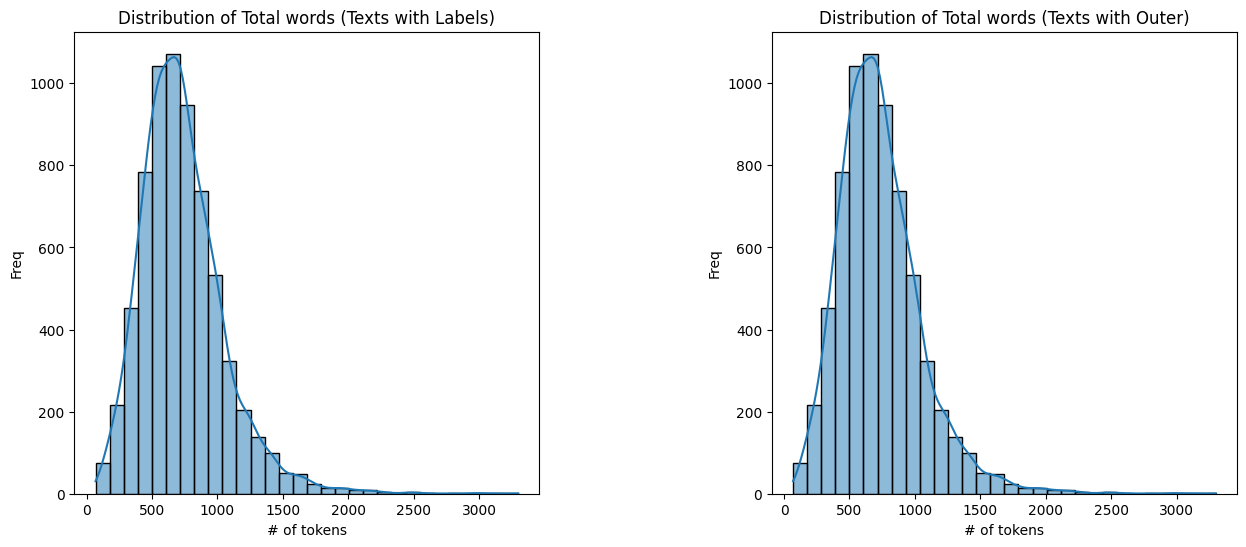

In [12]:
# Etiket içeren metinleri seç
df_with_labels = df[df['labels'].apply(lambda x: len(x) > 0)]
df_outer = df[df['labels'].apply(lambda x: 'O' in x)]

# İki grafik yan yana göstermek için subplot oluştur
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Etiket içeren grafiği çizdir
sns.histplot(df_with_labels['total_tokens'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Total words (Texts with Labels)')
axes[0].set_xlabel('# of tokens')
axes[0].set_ylabel('Freq')

# Only Outer grafiği çizdir
sns.histplot(df_outer['total_tokens'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Total words (Texts with Outer)')
axes[1].set_xlabel('# of tokens')
axes[1].set_ylabel('Freq')

# Grafikleri yan yana göster
plt.subplots_adjust(wspace=0.5)

# Grafikleri göster
plt.show()

# 4. Texts with Labels vs Texts without Labels
The first subplot displays the histogram of the total word count for all texts. The second subplot shows the histogram of the total word count for texts that have labels other than just "Outer(O)". This allows you to compare the distribution of the total word count for all texts and specifically examine the distribution of word counts for texts with labels.

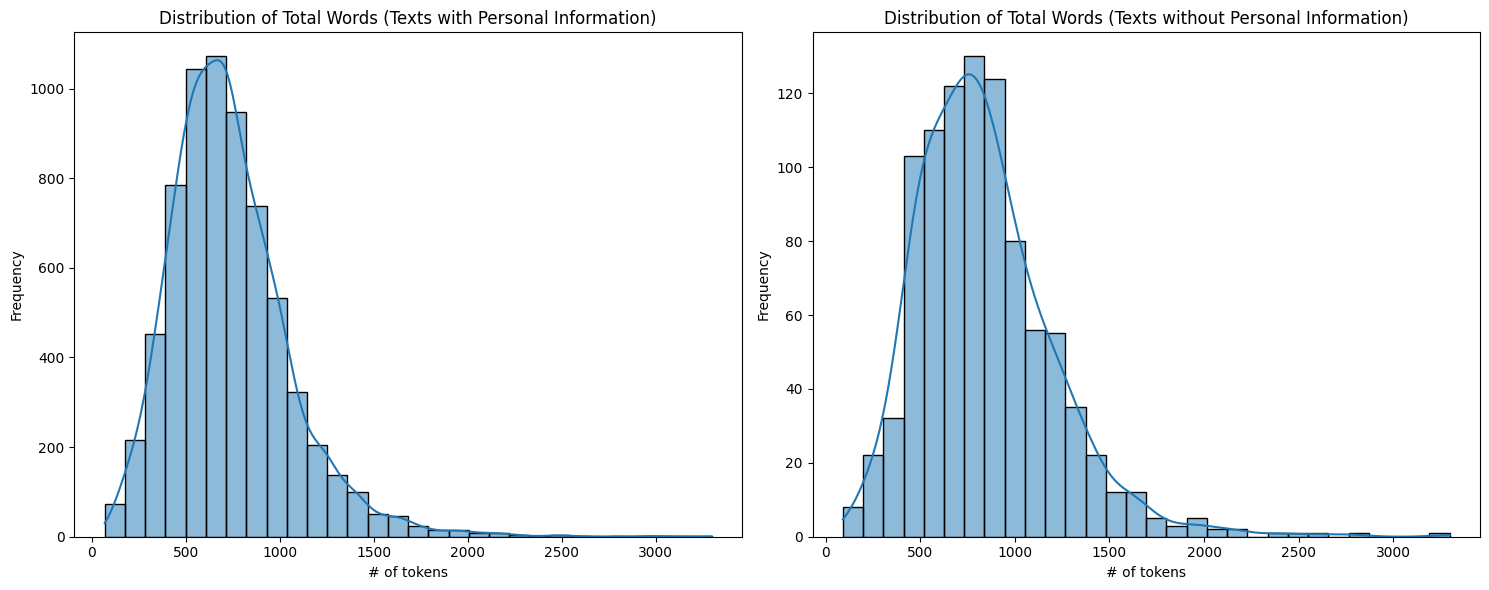

In [13]:
# 'labels' sütununda sadece Outer(O) etiketi içermeyenleri seç
df_non_outer = df[df['labels'].apply(lambda x: len(set(x)) > 1)]

# Etiket içeren text'lerin histogramı
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['total_tokens'], bins=30, kde=True, label='Texts with Personal Information')
plt.title('Distribution of Total Words (Texts with Personal Information)')
plt.xlabel('# of tokens')
plt.ylabel('Frequency')

# Etiket içermeyen text'lerin histogramı
plt.subplot(1, 2, 2)
sns.histplot(df_non_outer['total_tokens'], bins=30, kde=True, label='Texts without Personal Information')
plt.title('Distribution of Total Words (Texts without Personal Information)')
plt.xlabel('# of tokens')
plt.ylabel('Frequency')

# Grafikleri yan yana göster
plt.tight_layout()
plt.show()

# 5. Texts with personal information vs Texts without personal information

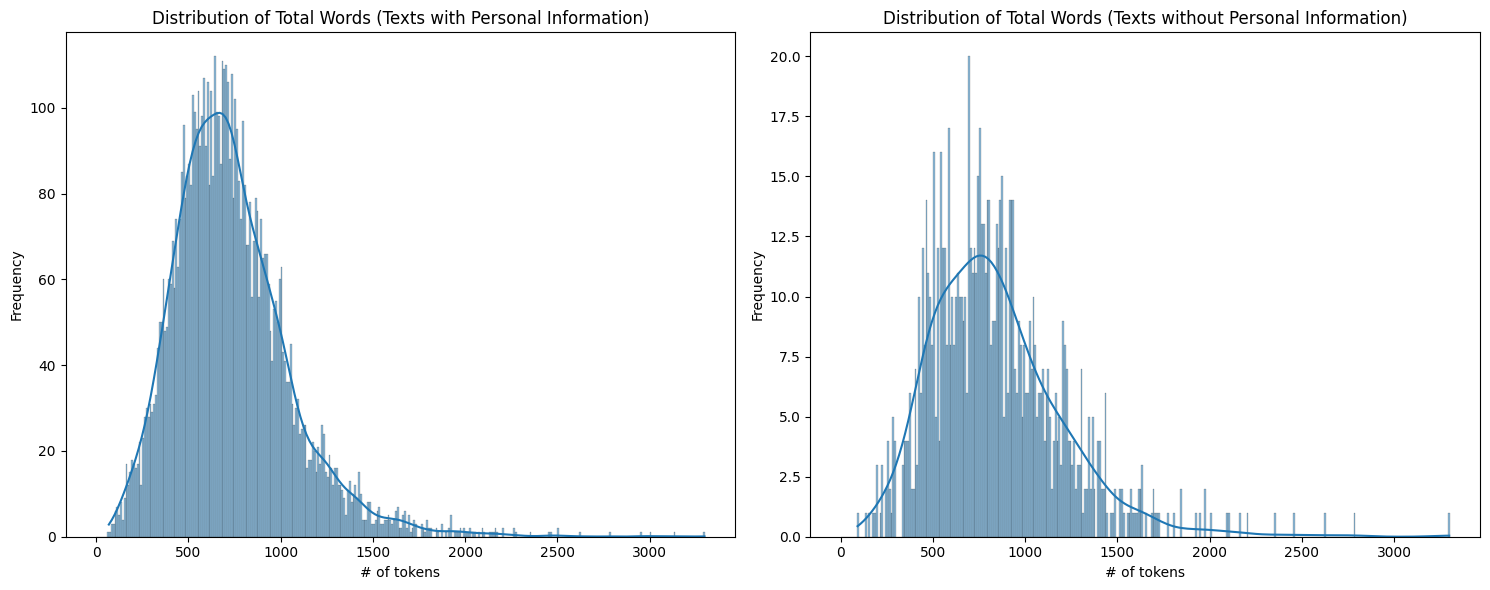

In [14]:
# 'total_tokens' sütununu hesapla
df['total_tokens'] = df['tokens'].apply(len)

# 'labels' sütununda sadece Outer(O) etiketi içermeyenleri seç
df_non_outer = df[df['labels'].apply(lambda x: len(set(x)) > 1)]

# Frekans aralığını hesapla
max_freq = max(df['total_tokens'].max(), df_non_outer['total_tokens'].max())
bins = range(0, max_freq+10, 10)

# Etiket içeren text'lerin histogramı
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['total_tokens'], bins=bins, kde=True, label='Texts with Personal Information')
plt.title('Distribution of Total Words (Texts with Personal Information)')
plt.xlabel('# of tokens')
plt.ylabel('Frequency')

# Etiket içermeyen text'lerin histogramı
plt.subplot(1, 2, 2)
sns.histplot(df_non_outer['total_tokens'], bins=bins, kde=True, label='Texts without Personal Information')
plt.title('Distribution of Total Words (Texts without Personal Information)')
plt.xlabel('# of tokens')
plt.ylabel('Frequency')

# Grafikleri yan yana göster
plt.tight_layout()
plt.show()

# 6. Label-containing Texts" and "Texts without labels other than "Outer"

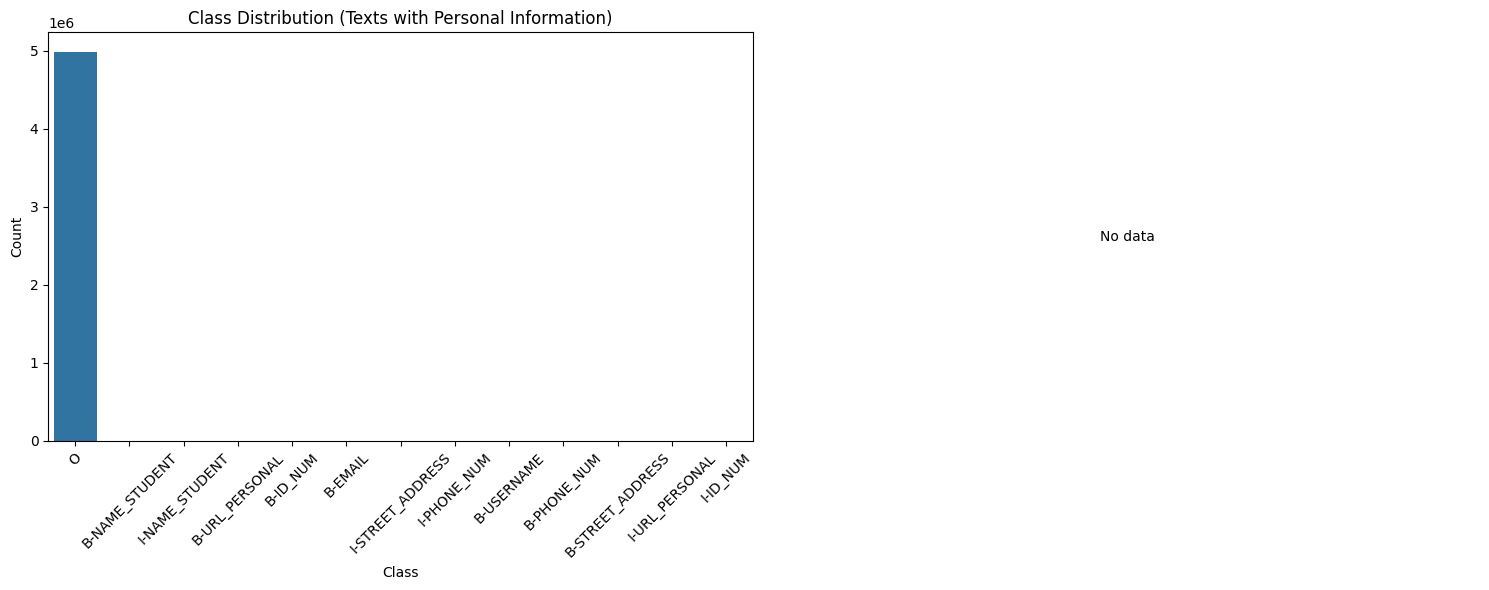

In [15]:
# Etiket içeren text'lerin sınıf dağılımı
label_counts = df['labels'].explode().value_counts()

# Etiket içermeyen text'lerin sınıf dağılımı
label_counts_non_outer = df[df['labels'].apply(lambda x: 'O' not in x)]['labels'].explode().value_counts()

# Yan yana grafikleri oluşturma
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Etiket içeren text'lerin sınıf dağılımı
sns.barplot(x=label_counts.index, y=label_counts.values, ax=axes[0])
axes[0].set_title('Class Distribution (Texts with Personal Information)')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Etiket içermeyen text'lerin sınıf dağılımı
if not label_counts_non_outer.empty:
    sns.barplot(x=label_counts_non_outer.index, y=label_counts_non_outer.values, ax=axes[1])
    axes[1].set_title('Class Distribution (Texts without Personal Information)')
    axes[1].set_xlabel('Class')
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=45)
else:
    axes[1].axis('off')
    axes[1].text(0.5, 0.5, 'No data', horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes)

# Grafikleri göster
plt.tight_layout()
plt.show()

# 7. "Relationship between Text Length and Number of Labels (All Texts) " and "Relationship between Text Length and Number of Labels (Texts without Outer(O))"
In the first subplot, a scatter plot is displayed showing the relationship between the text length and the number of labels for all texts. In the second subplot, another scatter plot is shown illustrating the relationship between the text length and the number of labels for texts excluding the "Outer(O)" label.

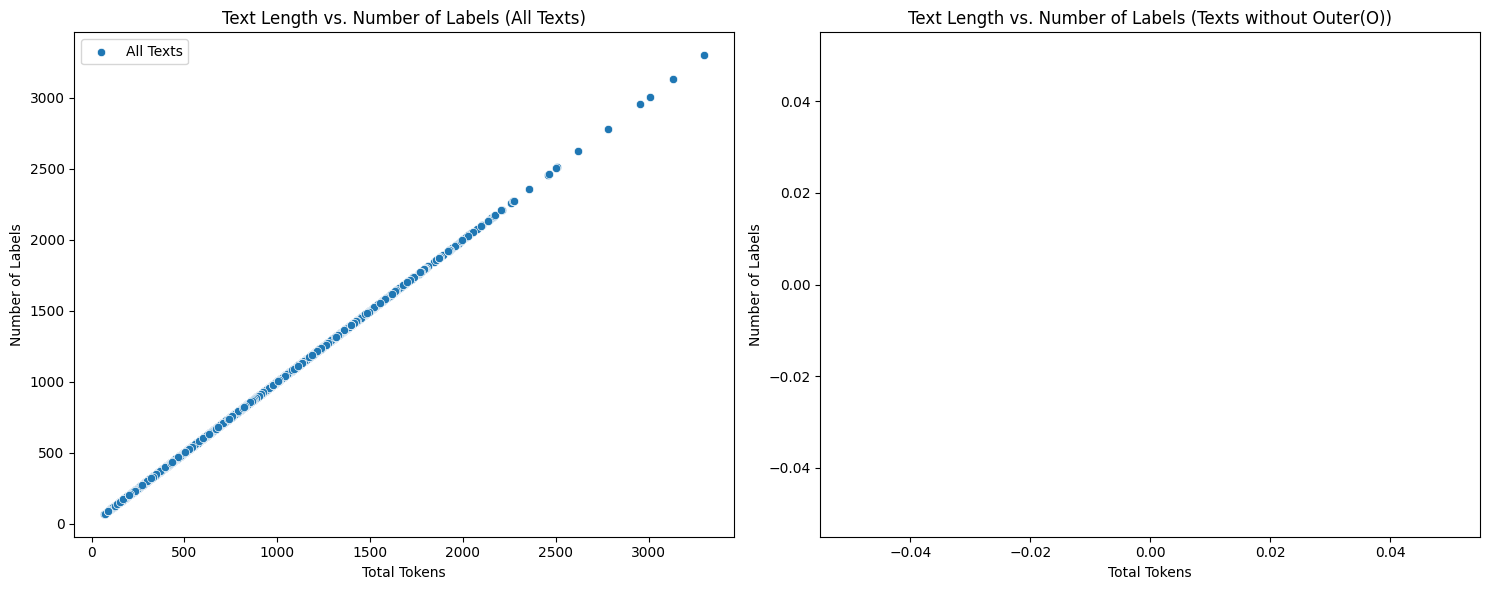

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri kümesini yükle
df = pd.read_json('/kaggle/input/pii-detection-removal-from-educational-data/train.json', encoding='utf-8-sig')

# 'total_tokens' sütununu hesapla
df['total_tokens'] = df['tokens'].apply(len)

# Etiket içermeyen text'leri filtrele
df_non_outer = df[df['labels'].apply(lambda x: 'O' not in x)]

# Etiket içeren text'lerin metin uzunluğu ve etiket sayısı arasındaki ilişki
df['num_labels'] = df['labels'].apply(len)
df_non_outer['num_labels'] = df_non_outer['labels'].apply(len)

# Yan yana grafikleri oluşturma
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Tüm metinlerin metin uzunluğu ve etiket sayısı
sns.scatterplot(x='total_tokens', y='num_labels', data=df, label='All Texts', ax=axes[0])
axes[0].set_title('Text Length vs. Number of Labels (All Texts)')
axes[0].set_xlabel('Total Tokens')
axes[0].set_ylabel('Number of Labels')

# Etiket içermeyen metinlerin metin uzunluğu ve etiket sayısı
sns.scatterplot(x='total_tokens', y='num_labels', data=df_non_outer, label='Texts without Outer(O)', ax=axes[1])
axes[1].set_title('Text Length vs. Number of Labels (Texts without Outer(O))')
axes[1].set_xlabel('Total Tokens')
axes[1].set_ylabel('Number of Labels')

# Grafikleri göster
plt.tight_layout()
plt.show()

# 8. Text Length vs Number of Labels


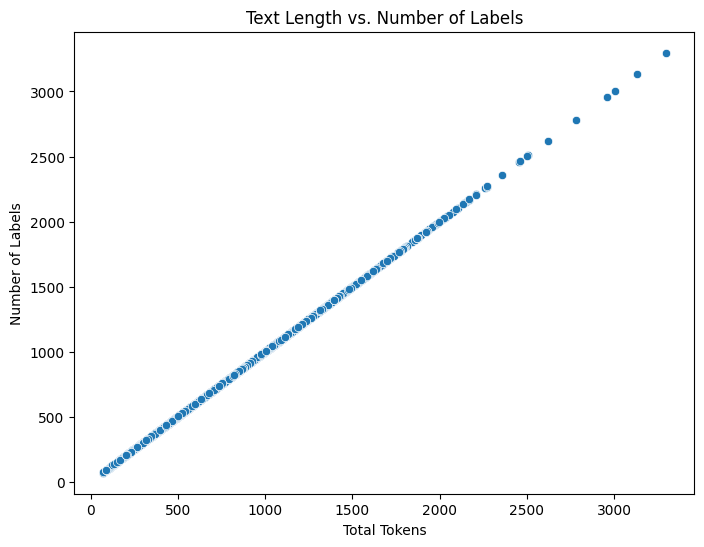

In [17]:
#Metin uzunluğu ile etiketler arasındaki ilişkiyi göstermek için bir nokta bulutu grafiği.
#Her bir nokta, metin uzunluğunu ve o metindeki etiket sayısını temsil eder
df['num_labels'] = df['labels'].apply(len)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_tokens', y='num_labels', data=df)
plt.title('Text Length vs. Number of Labels')
plt.xlabel('Total Tokens')
plt.ylabel('Number of Labels')
plt.show()

# 9. This code snippet is used to check if there are any texts without labels (excluding 'outer'). It provides an output based on the result of this check, indicating whether such texts exist or not.

In [18]:
# 'labels' sütununda sadece outer(O) etiketi içermeyen metinleri filtrele
df_non_outer = df[df['labels'].apply(lambda x: 'O' not in x)]

# 'df_non_outer' veri çerçevesinin boş olup olmadığını kontrol et
if df_non_outer.empty:
    print("There are no texts without labels (excluding 'outer').")
else:
    print("There are texts without labels (excluding 'outer').")

There are no texts without labels (excluding 'outer').


# 10. Top 25 Most Common Tokens

In [19]:
all_tokens = [token for sublist in df['tokens'] for token in sublist]
token_freq = Counter(all_tokens)
most_common_tokens = token_freq.most_common(25)

all_labels = [label for sublist in df['labels'] for label in sublist]
label_freq = Counter(all_labels)
most_common_labels = label_freq.most_common(25)



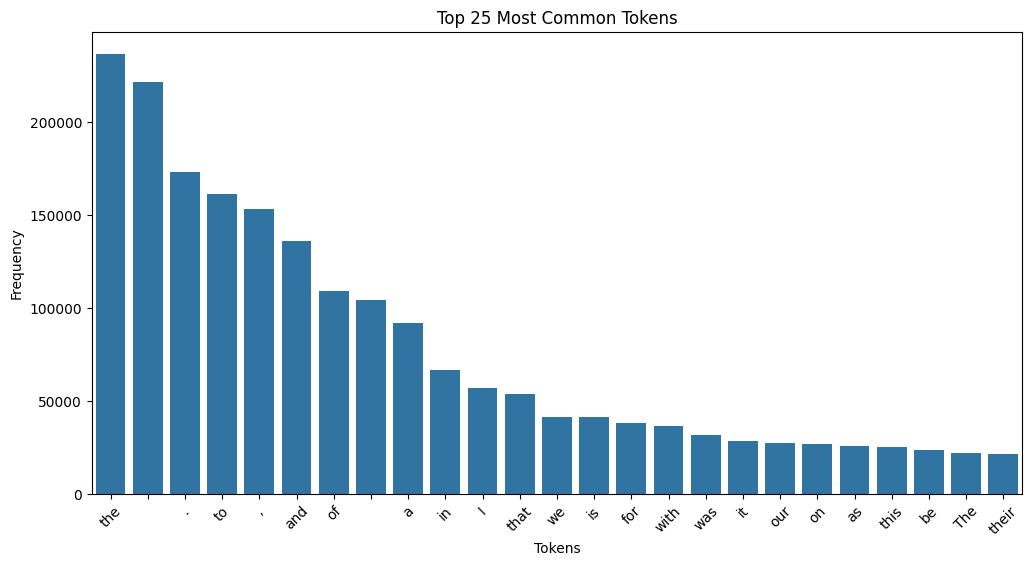

In [20]:
plt.figure(figsize=(12, 6))
tokens, frequencies = zip(*most_common_tokens)
sns.barplot(x=list(tokens), y=list(frequencies))
plt.title('Top 25 Most Common Tokens')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



This graph shows the top 25 tokens and their frequencies. The most common token is "the", which is used significantly more than the others. The punctuation mark "." is also heavily used. Typical tokens such as "to", "and", "of", "a", and "in" are frequently used as well.

# 11. Most common labels and their frequency

In [21]:
most_common_labels

[('O', 4989794),
 ('B-NAME_STUDENT', 1365),
 ('I-NAME_STUDENT', 1096),
 ('B-URL_PERSONAL', 110),
 ('B-ID_NUM', 78),
 ('B-EMAIL', 39),
 ('I-STREET_ADDRESS', 20),
 ('I-PHONE_NUM', 15),
 ('B-USERNAME', 6),
 ('B-PHONE_NUM', 6),
 ('B-STREET_ADDRESS', 2),
 ('I-URL_PERSONAL', 1),
 ('I-ID_NUM', 1)]

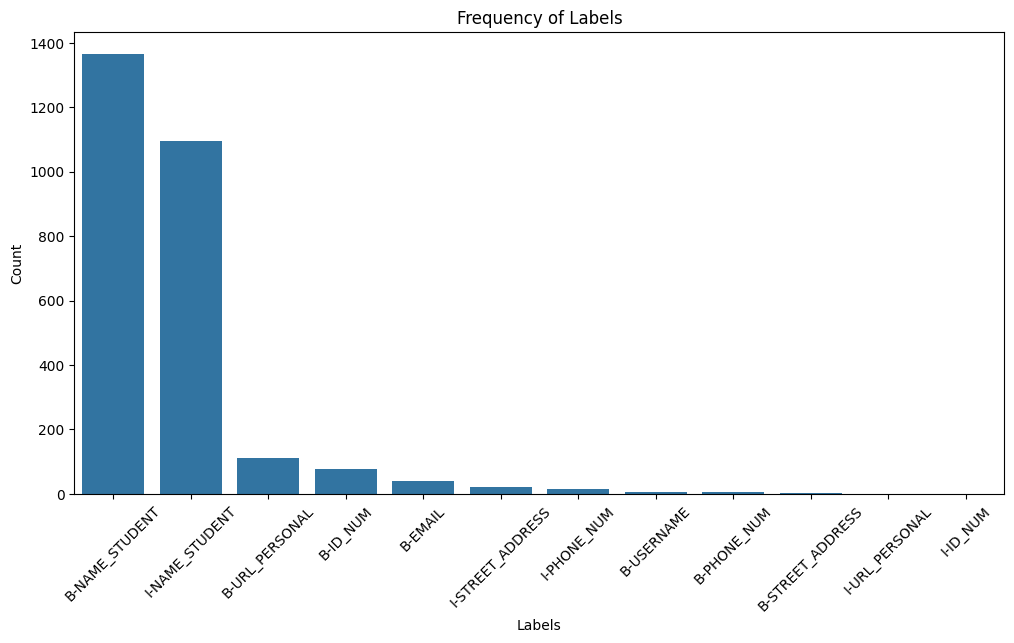

In [22]:
except_O_most_common_labels = [(k,f) for (k,f) in most_common_labels if k != 'O']
plt.figure(figsize=(12,6))
labels, label_counts = zip(*except_O_most_common_labels)
sns.barplot(x=list(labels), y=list(label_counts))
plt.title('Frequency of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

This graph depicts the frequency of labels. The most frequently occurring label is "B-NAME_STUDENT," which has a significantly higher count compared to the others. The imbalances in label frequencies can impact the training and evaluation of the model. There might be a bias in the label distribution during the collection of the dataset, where certain labels are overrepresented or underrepresented. The dataset's size could contribute to the imbalance, as there might be limited data available for some labels.

# 12. Percentage of Punctuation Usage-With labels vs Without Labels

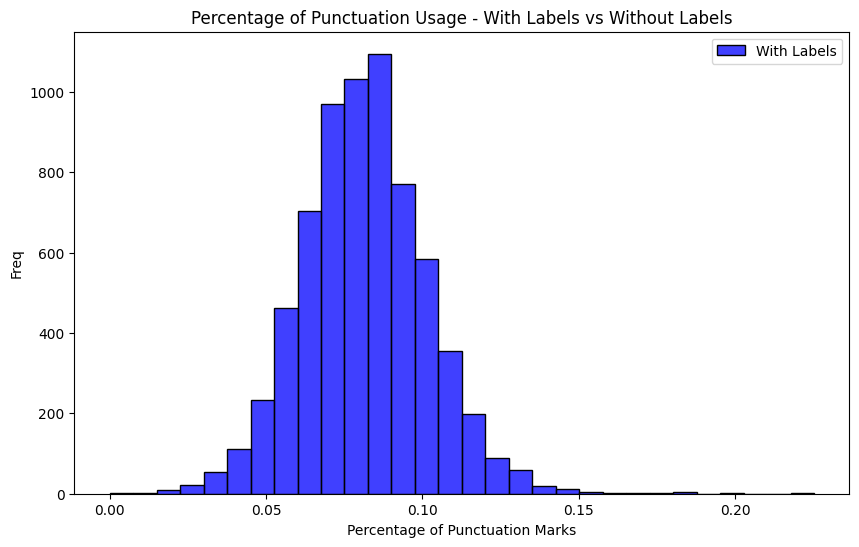

In [23]:
import string

# A graph illustrating the difference in the percentage of punctuation mark usage between text samples with labels and without labels.
df['punctuation_percentage'] = df['tokens'].apply(lambda x: sum([1 for token in x if token in string.punctuation]) / len(x))
plt.figure(figsize=(10, 6))
sns.histplot(df[df['labels'].apply(len) > 0]['punctuation_percentage'], bins=30, color='blue', label='With Labels')
sns.histplot(df[df['labels'].apply(len) == 0]['punctuation_percentage'], bins=30, color='red', label='Without Labels')
plt.title('Percentage of Punctuation Usage - With Labels vs Without Labels')
plt.xlabel('Percentage of Punctuation Marks')
plt.ylabel('Freq')
plt.legend()
plt.show()

### **Name, URL, ID and Email are frequent labels**

The competition asks competitors to assign labels to the following seven types of PII:

**NAME_STUDENT** - The full or partial name of a student that is not necessarily the author of the essay. This excludes instructors, authors, and other person names.

**EMAIL** - A student’s email address.

**USERNAME** - A student's username on any platform.

**ID_NUM** - A number or sequence of characters that could be used to identify a student, such as a student ID or a social security number.

**PHONE_NUM** - A phone number associated with a student.

**URL_PERSONAL** - A URL that might be used to identify a student.

**STREET_ADDRESS** - A full or partial street address that is associated with the student, such as their home address.

# 13. Distribution of Type-Token %

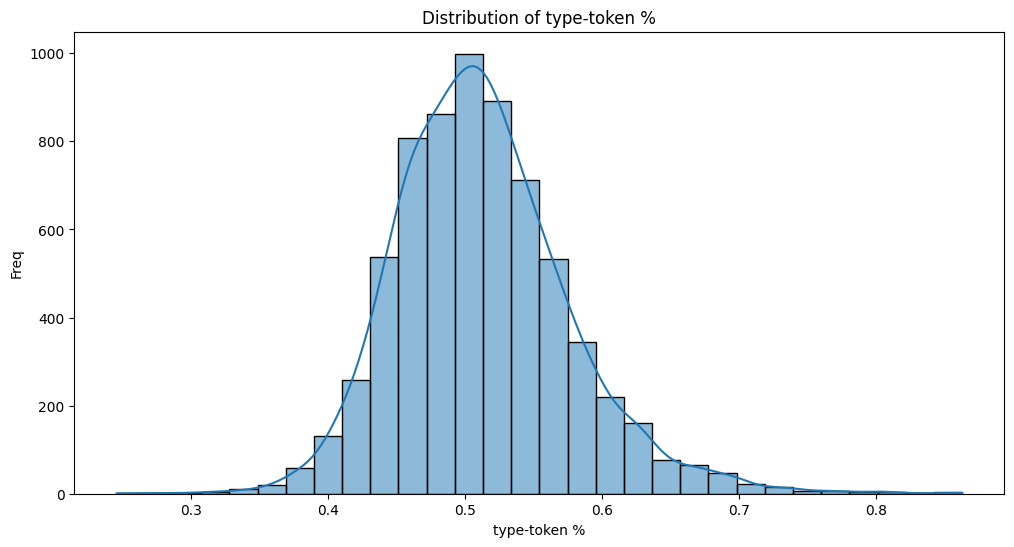

In [24]:
def token_type_ratio(text):
    tokens = text.split()
    types = set(tokens)
    return len(types) / len(tokens) if len(tokens) > 0 else 0


df['diversity'] = df['full_text'].apply(token_type_ratio)
plt.figure(figsize=(12, 6))
sns.histplot(df['diversity'], bins=30, kde=True)
plt.title('Distribution of type-token %')
plt.xlabel('type-token %')
plt.ylabel('Freq')
plt.show()

> Tip-Token Ratio = Benzersiz kelimelerin (tipler) toplam kelime sayısına (tokenlar) bölünmesiyle hesaplanır. TTR değerleri x-ekseni boyunca dağılmış ve yaklaşık  0.25 ile 0.75 arasında bir değer aralığına sahip.
y-ekseni, belirli bir TTR değerine sahip belgelerin veya metin segmentlerinin frekansını temsil etmekte
En yaygın TTR değerleri yaklaşık 0.4 ile 0.6 arasında bulunuyor ve en yüksek frekans 0.5 civarında gerçekleşmekte.
Dağılımdan metnin ortalama bir kelime çeşitliliğe sahip olduğunu ve çok yüksek / çok düşük çeşitliliğe sahip metinlerin az oldugunu cıkarabiliriz.

****Ayrıca;

****Daha yüksek bir TTR, daha geniş bir kelime dağarcığına sahip olan metinleri gösterir

****Daha düşük bir TTR, daha tekrarlayan bir kelime kullanımını gösterir

## **🚀 The best way to The Learning Agency Lab - PII Data Detection competition 🚀**

Dears,

I hope this message finds you well.

**1. Cast Your Vote:**

Visit the competition platform and find my EDA submission. Click on the "Vote" or "Support" button to cast your vote.

**2. Share with Your Network:**

Spread the word among your friends, family, and colleagues who may be interested in supporting my work.

**3. Provide Feedback:**

If you have any feedback or suggestions on my EDA, please feel free to share them with me. Your input is valuable and can help me improve. I am committed to making a positive impact in the field of cancer research, and your support will bring me one step closer to achieving that goal.

Thank you for taking the time to read this message, and I genuinely appreciate your support in this competition. Together, we can contribute to the fight against ovarian cancer and advance the field of data-driven healthcare.

If you have any questions or need more information about my EDA, please don't hesitate to reach out to me. Your support means the world to me!

